# Laboratory Manual: 9. Random Signal Analysis. 9. Power Spectrum Estimation

## Types of Random Signals

Random signals can be categorized by their statistical properties, distribution, and spectral content. Below are some common types used in signal processing.

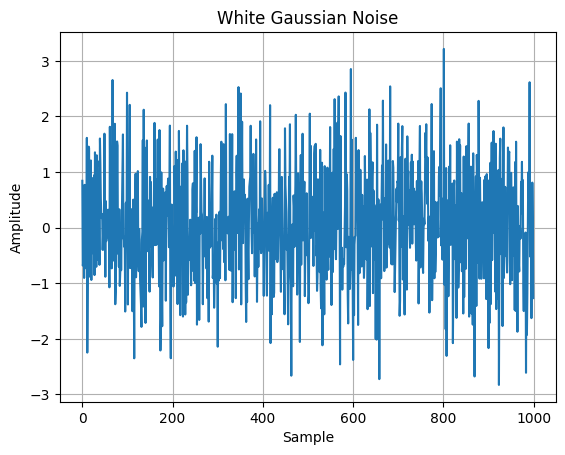

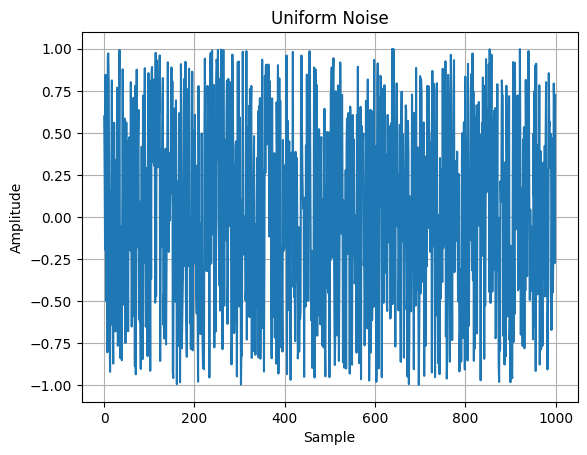

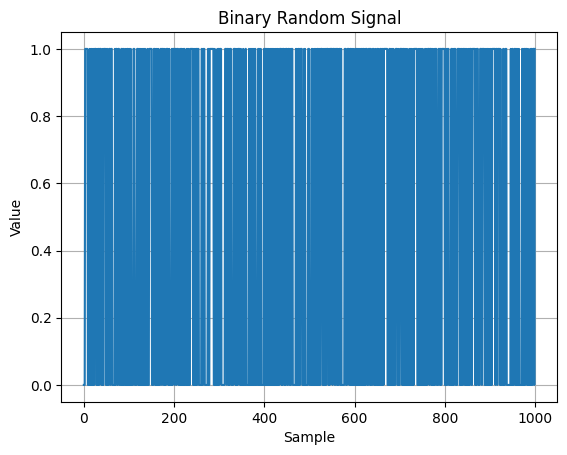

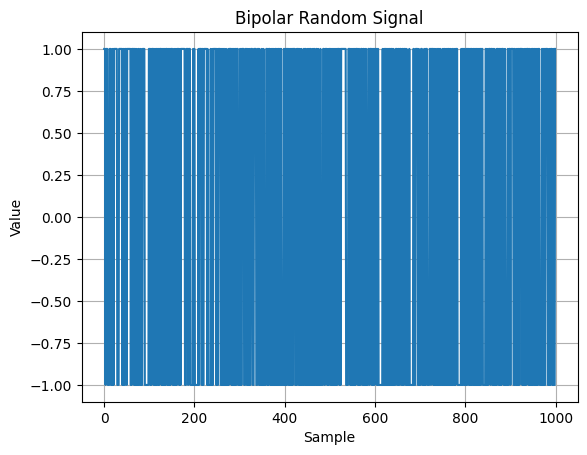

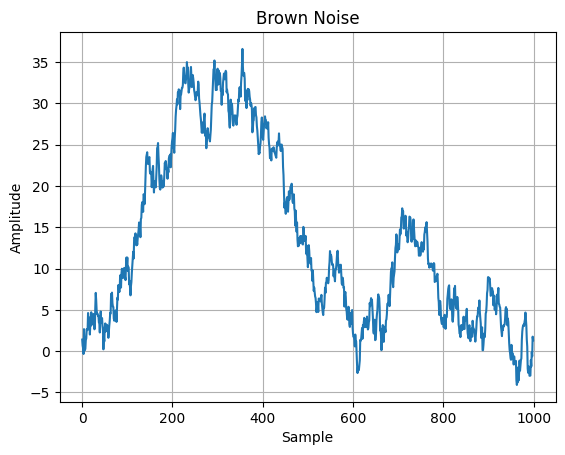

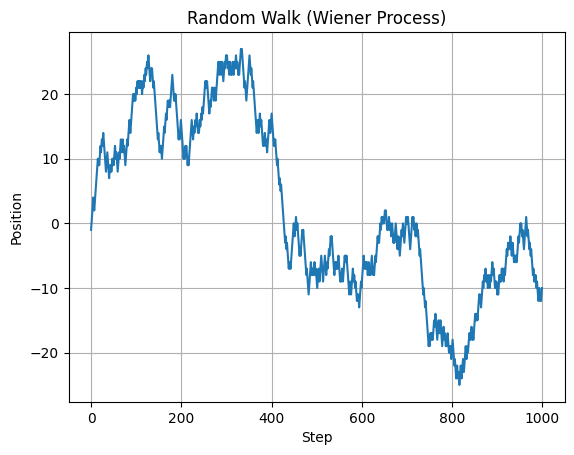

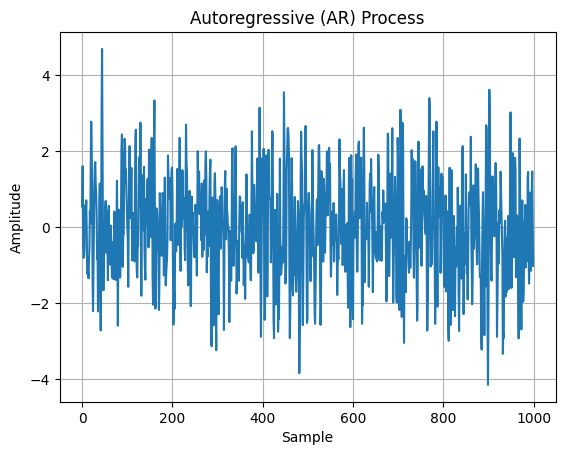

In [19]:

#1. White Gaussian Noise (WGN)}
#A zero-mean, normally distributed random signal with flat power spectral density.
import numpy as np
import matplotlib.pyplot as plt

N = 1000
white_noise = np.random.normal(loc=0.0, scale=1.0, size=N)

plt.plot(white_noise)
plt.title("White Gaussian Noise")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


#2. Uniform Noise
#Random signal with values uniformly distributed in a given range.
uniform_noise = np.random.uniform(low=-1.0, high=1.0, size=N)

plt.plot(uniform_noise)
plt.title("Uniform Noise")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


#3. Binary Random Signal
#Signal with values switching between 0 and 1 (or -1 and 1), often representing digital noise.
binary_signal = np.random.choice([0, 1], size=N)
plt.plot(binary_signal)
plt.title("Binary Random Signal")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.grid(True)
plt.show()

bipolar_signal = np.random.choice([-1, 1], size=N)
plt.plot(bipolar_signal)
plt.title("Bipolar Random Signal")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.grid(True)
plt.show()


#4. Colored Noise (e.g. Pink, Brown)
#Filtered versions of white noise to produce specific spectral characteristics.
white_noise = np.random.normal(0, 1, N)
brown_noise = np.cumsum(white_noise)

plt.plot(brown_noise)
plt.title("Brown Noise")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


#5. Random Walk (Wiener Process)
#A non-stationary process formed by cumulative summation of independent steps.
steps = np.random.choice([-1, 1], size=N)
random_walk = np.cumsum(steps)

plt.plot(random_walk)
plt.title("Random Walk (Wiener Process)")
plt.xlabel("Step")
plt.ylabel("Position")
plt.grid(True)
plt.show()


#6. AR (Autoregressive) Process
#Model-based random process where each sample depends on previous ones and noise.
from scipy.signal import lfilter

# AR coefficients: x[n] = -a1*x[n-1] - a2*x[n-2] + w[n]
a = [1, -0.75, 0.5]  # Note: first element is 1 for filter format
w = np.random.normal(0, 1, N)
ar_signal = lfilter([1], a, w)

plt.plot(ar_signal)
plt.title("Autoregressive (AR) Process")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

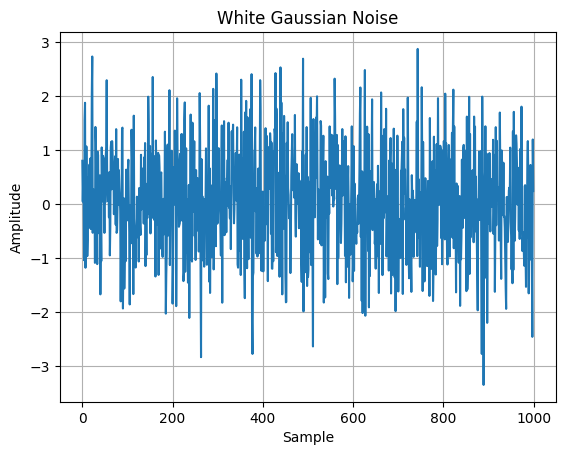

Estimated Mean: 0.0545
Estimated Variance: 0.9310


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000
mean_val = 0
std_dev = 1

# Generate random signal
signal = np.random.normal(loc=mean_val, scale=std_dev, size=N)

# Statistical properties
mean = np.mean(signal)
variance = np.var(signal)

# Plot
plt.figure()
plt.plot(signal)
plt.title("White Gaussian Noise")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

print(f"Estimated Mean: {mean:.4f}")
print(f"Estimated Variance: {variance:.4f}")

## Example: Autocorrelation of a Random Signal

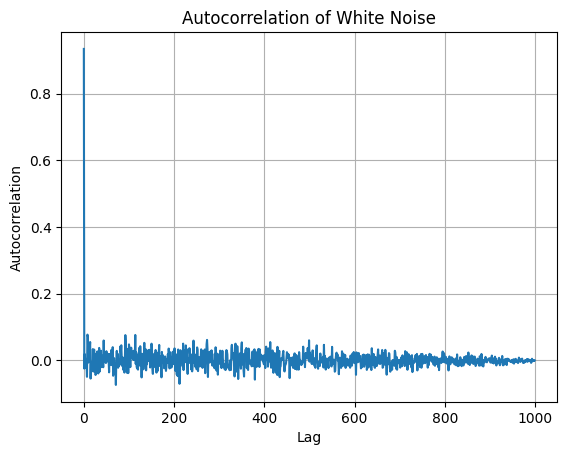

In [21]:
def autocorrelation(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:] / len(x)

r = autocorrelation(signal)

plt.figure()
plt.plot(r)
plt.title("Autocorrelation of White Noise")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

## All the characteristics

Global Mean: 0.0014, Global Variance: 1.0052


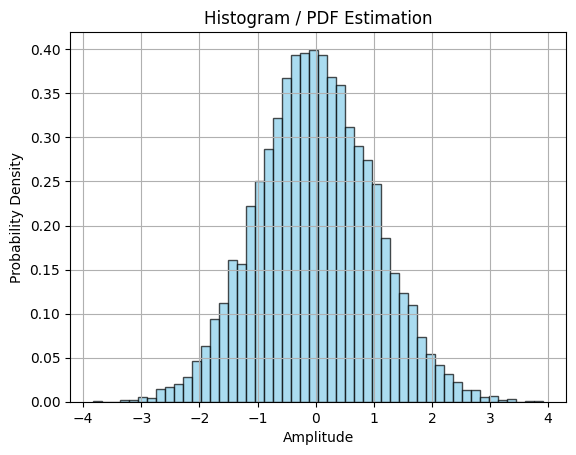

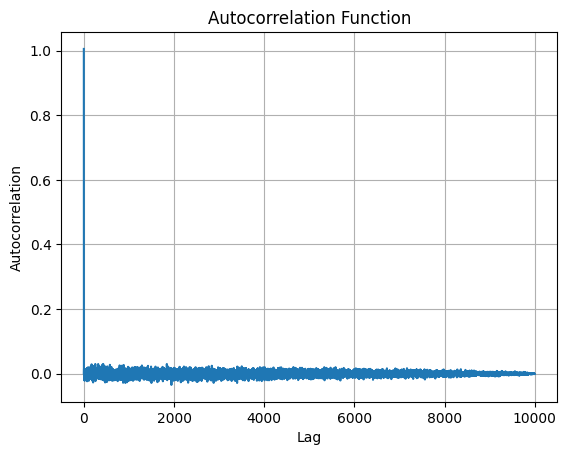

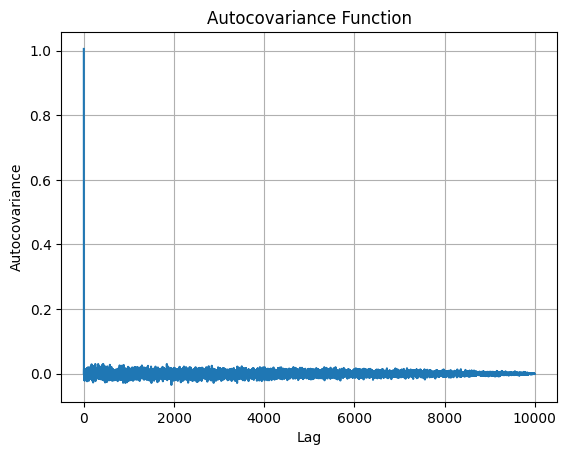

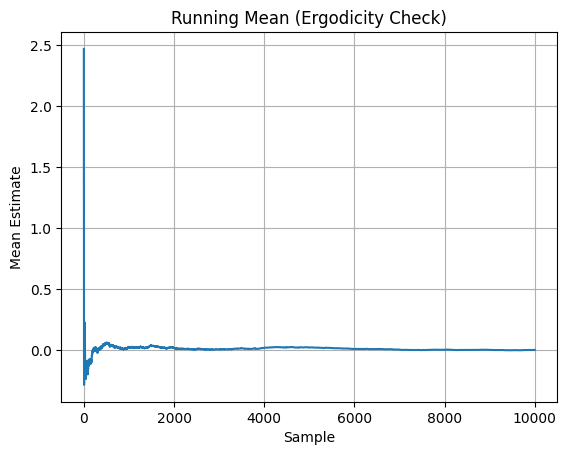

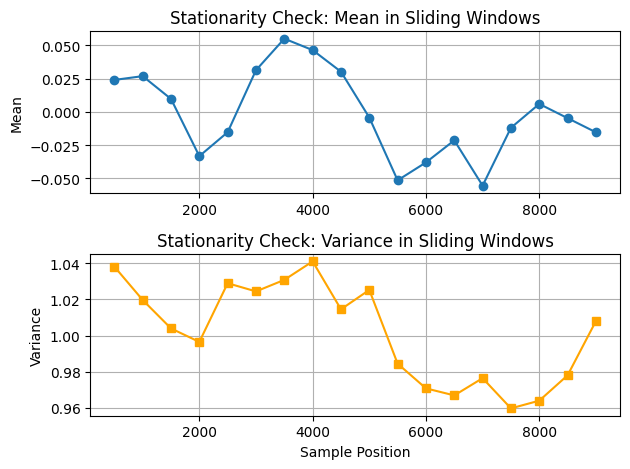

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Parameters
N = 10000
mean_val = 0
std_dev = 1
fs = 1000  # Sampling frequency

# Generate white Gaussian noise
signal = np.random.normal(loc=mean_val, scale=std_dev, size=N)

# --- 1. Mean and Variance ---
mean = np.mean(signal)
variance = np.var(signal)
print(f"Global Mean: {mean:.4f}, Global Variance: {variance:.4f}")

# --- 2. Histogram (PDF estimation) ---
plt.figure()
plt.hist(signal, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Histogram / PDF Estimation")
plt.xlabel("Amplitude")
plt.ylabel("Probability Density")
plt.grid(True)

# --- 3. Autocorrelation Function ---
def autocorrelation(x):
    result = correlate(x, x, mode='full')
    result = result[result.size // 2:] / len(x)
    return result

autocorr = autocorrelation(signal)

plt.figure()
plt.plot(autocorr)
plt.title("Autocorrelation Function")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)

# --- 4. Autocovariance Function ---
signal_centered = signal - np.mean(signal)
autocov = autocorrelation(signal_centered)

plt.figure()
plt.plot(autocov)
plt.title("Autocovariance Function")
plt.xlabel("Lag")
plt.ylabel("Autocovariance")
plt.grid(True)

# --- 5. Running Mean (Ergodicity Demonstration) ---
running_mean = np.cumsum(signal) / np.arange(1, N + 1)

plt.figure()
plt.plot(running_mean)
plt.title("Running Mean (Ergodicity Check)")
plt.xlabel("Sample")
plt.ylabel("Mean Estimate")
plt.grid(True)

# --- 7. Stationarity Check (Sliding Window Stats) ---
window_size = 1000
step = 500
means = []
vars_ = []
positions = []

for start in range(0, N - window_size, step):
    window = signal[start:start + window_size]
    means.append(np.mean(window))
    vars_.append(np.var(window))
    positions.append(start + window_size // 2)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(positions, means, marker='o')
plt.title("Stationarity Check: Mean in Sliding Windows")
plt.ylabel("Mean")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(positions, vars_, marker='s', color='orange')
plt.title("Stationarity Check: Variance in Sliding Windows")
plt.xlabel("Sample Position")
plt.ylabel("Variance")
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()

# Power Spectrum Density Estimation

## Periodogram Method

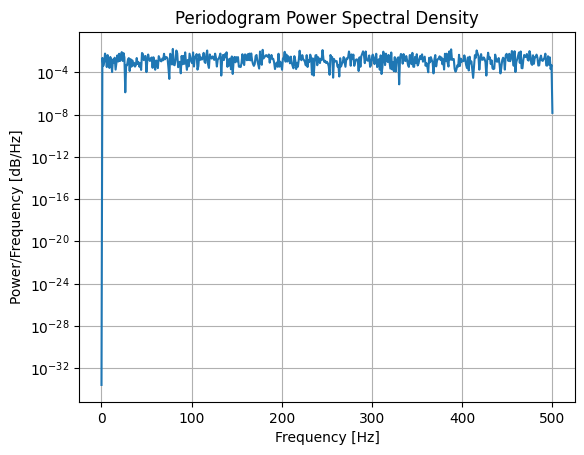

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

fs = 1000
N = 1024
signal = np.random.normal(0, 1, N)

f, Pxx = periodogram(signal, fs=fs)

plt.figure()
plt.semilogy(f, Pxx)
plt.title("Periodogram Power Spectral Density")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB/Hz]")
plt.grid(True)
plt.show()

## Welch's Method

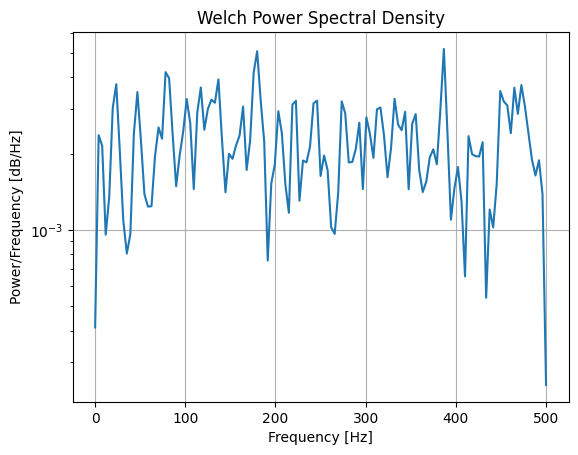

In [24]:
from scipy.signal import welch

f, Pxx = welch(signal, fs=fs, nperseg=256, noverlap=128, window='hann')

plt.figure()
plt.semilogy(f, Pxx)
plt.title("Welch Power Spectral Density")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB/Hz]")
plt.grid(True)
plt.show()

## Comparing Window Types

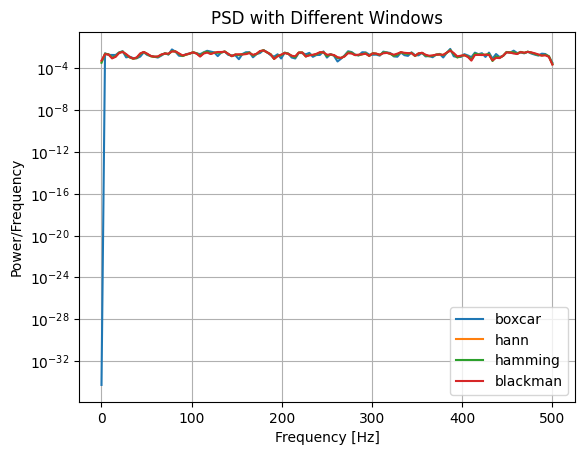

In [25]:
from scipy.signal import get_window

windows = ['boxcar', 'hann', 'hamming', 'blackman']

plt.figure()
for win in windows:
    f, Pxx = welch(signal, fs=fs, window=win, nperseg=256)
    plt.semilogy(f, Pxx, label=win)

plt.title("PSD with Different Windows")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency")
plt.legend()
plt.grid(True)
plt.show()

## Parametric Method (AR model)

In [26]:
#!pip install spectrum

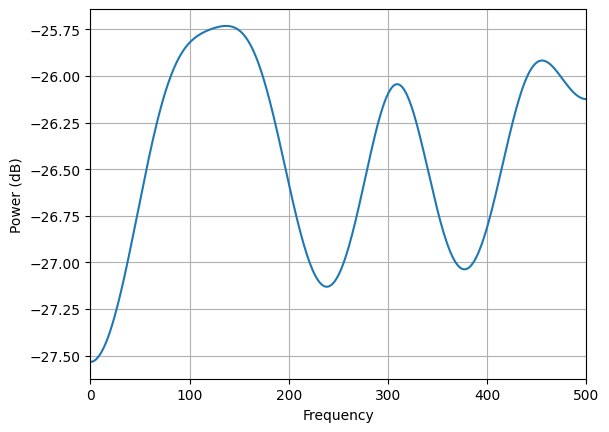

In [27]:
from spectrum import pburg

ar_order = 8
ar_model = pburg(signal, order=ar_order, NFFT=1024, sampling=fs)
ar_model.plot()

Generate an AR(2) process using predefined coefficients. Analyze the signal’s autocorrelation.
Estimate the PSD using parametric (AR) methods and compare with theoretical
PSD.

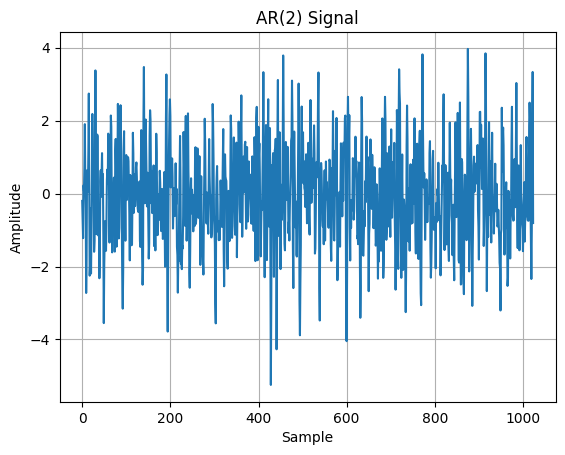

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz

# Parametry
N = 1024
a = [1, -0.75, 0.5]  # AR coefficients: a[0] must be 1
w = np.random.normal(0, 1, N)  # white noise

# Generacja procesu AR(2)
ar_signal = lfilter([1], a, w)

# Wykres sygnału
plt.figure()
plt.plot(ar_signal)
plt.title("AR(2) Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


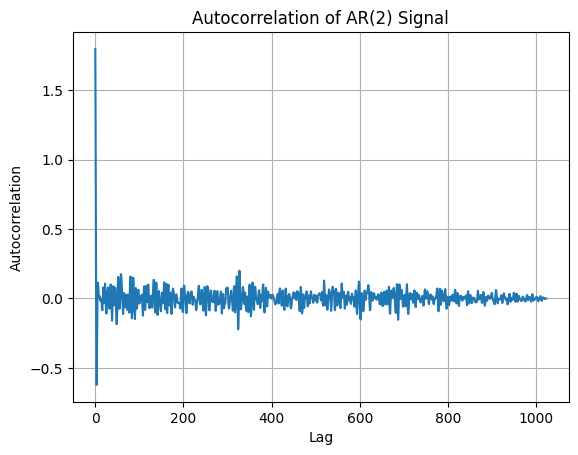

In [29]:
def autocorrelation(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:] / len(x)

r = autocorrelation(ar_signal)

plt.figure()
plt.plot(r)
plt.title("Autocorrelation of AR(2) Signal")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()


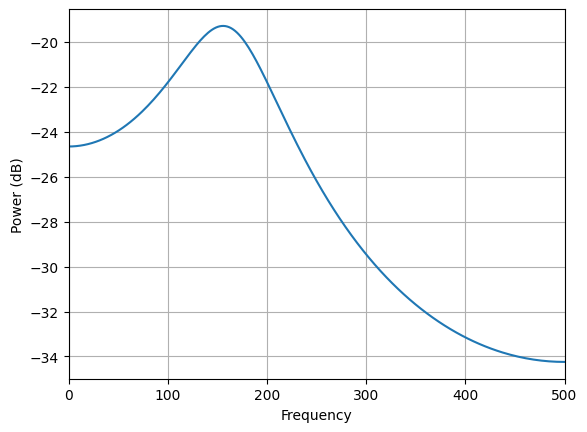

In [30]:
from spectrum import pburg

ar_order = 2  # Ponieważ to AR(2)
ar_model = pburg(ar_signal, order=ar_order, NFFT=512, sampling=1000)
ar_model.plot()


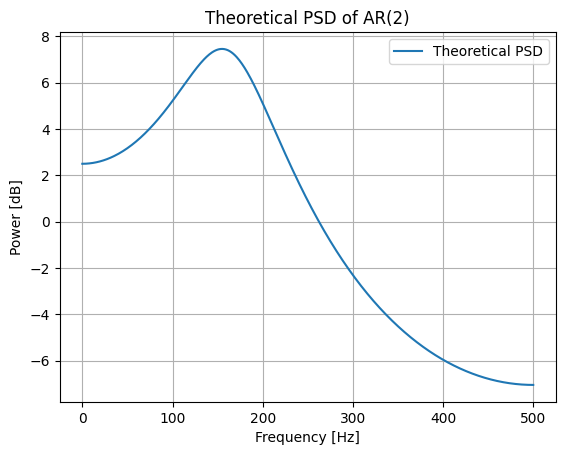

In [31]:
# Częstotliwości
f = np.linspace(0, 0.5, 512)  # znormalizowana częstotliwość (fs = 1)
w = 2 * np.pi * f
# Oblicz wartości transmitancji H(f)
den = np.abs(1 - 0.75*np.exp(-1j*w) + 0.5*np.exp(-2j*w))**2
S_theoretical = 1 / den  # zakładamy sigma^2 = 1

plt.figure()
plt.plot(f * 1000, 10*np.log10(S_theoretical), label='Theoretical PSD')
plt.title("Theoretical PSD of AR(2)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power [dB]")
plt.grid(True)
plt.legend()
plt.show()


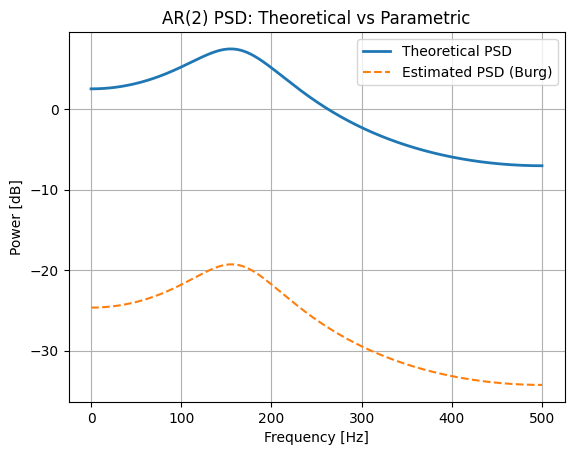

In [32]:
# Teoretyczna PSD
plt.figure()
plt.plot(f * 1000, 10*np.log10(S_theoretical), label='Theoretical PSD', linewidth=2)

# Parametryczna PSD z modelu Burg
plt.plot(ar_model.frequencies(), 10*np.log10(ar_model.psd), label='Estimated PSD (Burg)', linestyle='--')

plt.title("AR(2) PSD: Theoretical vs Parametric")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power [dB]")
plt.legend()
plt.grid(True)
plt.show()
